In [1]:
#Importing required libraries and reading the Data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
## Input data files are available in the "../input/" directory.
df = pd.read_csv('data.csv')

In [3]:
#Printing head of the dataset
df.head(5)

,S#,Date,Time,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,...,Injured Min,Injured Max,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)
0,1.0,"Friday, June 18, 2004",22:00,Near Wana,south Waziristan,FATA,1.0,NaN,1.0,0.0,...,NaN,NaN,N,Blast occured in courtyard of the house of lon...,Village in Wana,http://archives.dawn.com/2004/06/19/top1.htm,69.9000,33.0333,28.475,83.255
1,2.0,"Sunday, May 08, 2005",23:30,Mir Ali (Near Afghan Border),North Waziristan,FATA,1.0,1.0,NaN,0.0,...,NaN,NaN,N,Drone struck a car driven by local warlord- ki...,Civilian killied was Samiullah Khan who was a ...,http://www.msnbc.msn.com/id/7847008/,70.1455,32.9746,11.475,52.655
2,3.0,"Thursday, December 01, 2005",NaN,Haisori- Miran Shah,North Waziristan,FATA,1.0,1.0,NaN,0.0,...,NaN,2.0,NaN,Explosive occurred at a mud house,No. 3 Al-Qaeda's Leader AbuHamza Rabia killed ...,http://edition.cnn.com/2005/WORLD/asiapcf/12/0...,70.1455,32.9746,7.080,44.744
3,4.0,"Friday, January 06, 2006",NaN,Saidgai village- 115km north of Wana,North Waziristan,FATA,1.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,http://www.reuters.com/article/2007/04/27/us-p...,70.1455,32.9746,0.535,32.963
4,5.0,"Friday, January 13, 2006",3:00,Damadola Village,Bajaur Agency,FATA,1.0,NaN,NaN,0.0,...,NaN,2.0,Y,Three houses were tarheted in Damadola village...,Masood Khan house was among those bombed. Want...,http://www.dailytimes.com.pk/default.asp?page=...,71.5000,34.6833,10.025,50.045


In [5]:
#Printing Tail of the dataset
df.tail(5)

,S#,Date,Time,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,...,Injured Min,Injured Max,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)
400,402.0,"Monday, June 12, 2017",21:00,Spin Thal,Hangu,KPK,1.0,NaN,NaN,0.0,...,0.0,0.0,N,Haqqani network leader Abubakar and his partne...,Thal city falls in Hangu district and lies clo...,https://www.dawn.com/news/1339293,33.358693,70.540720,NaN,NaN
401,403.0,"Monday, July 03, 2017",NaN,NaN,South Waziristan,FATA,2.0,NaN,NaN,0.0,...,0.0,0.0,N,a CIA-operated drone carried out a missile att...,NaN,https://www.dawn.com/news/1343100,32.120819,69.589987,23.0,74.0
402,404.0,"Friday, September 15, 2017",NaN,Ghuz Ghari,Kurram Agency,FATA,2.0,NaN,NaN,0.0,...,2.0,2.0,N,A US drone killed three suspected Afghan Talib...,NaN,https://www.dawn.com/news/1357853; https://www...,33.732174,70.150755,NaN,NaN
403,405.0,"Monday, October 16, 2017",NaN,Zero-point,Lower Kurram Agency,FATA,4.0,NaN,5.0,NaN,...,NaN,NaN,N,At least five suspected militants were killed ...,Conflict of Report: Foreign media reported tha...,http://www.thesundaily.my/news/2017/10/18/deat...,NaN,NaN,NaN,NaN
404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,662.0,1304.0,...,402.0,1329.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.drop(df.index[[403, 404]])

# Dropiing the Axes that are not required
df=df.drop(['Special Mention (Site)', 'References','Time'], axis=1)

# Printing the number of missing values in the data
for col in df:
    print (col, ": ", df[col].isnull().sum())

S# :  0
Date :  0
Location :  2
City :  0
Province :  0
No of Strike :  0
Al-Qaeda :  307
Taliban :  264
Civilians Min :  68
Civilians Max :  45
Foreigners Min :  312
Foreigners Max :  265
Total Died Min :  97
Total Died Mix :  3
Injured Min :  259
Injured Max :  128
Women/Children   :  68
Comments :  228
Longitude :  0
Latitude :  0
Temperature(C) :  2
Temperature(F) :  2


In [7]:
def filling_nan(data):
    
    # Initializing 'col' which stores the Column names of the columns whose null values need to be filled by 0
    col = ['Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max', 'Foreigners Min', 'Foreigners Max', 
           'Total Died Min', 'Total Died Mix', 'Injured Min', 'Injured Max']
    
    data[col] = data[col].fillna(0)                                  # Filling the above columns with 0
    data['Women/Children  '] = data['Women/Children  '].fillna('N')  # Filling the Women/Children column's missing values with 'N'
    data['Temperature(C)'] = data['Temperature(C)'].fillna(data['Temperature(C)'].mean())
    data['Temperature(F)'] = data['Temperature(F)'].fillna(data['Temperature(F)'].mean())
    
    return data

In [8]:
data = filling_nan(df)

# Printing the number of missing values in the data
for col in df:
    print (col, ": ", df[col].isnull().sum())

S# :  0
Date :  0
Location :  2
City :  0
Province :  0
No of Strike :  0
Al-Qaeda :  0
Taliban :  0
Civilians Min :  0
Civilians Max :  0
Foreigners Min :  0
Foreigners Max :  0
Total Died Min :  0
Total Died Mix :  0
Injured Min :  0
Injured Max :  0
Women/Children   :  0
Comments :  228
Longitude :  0
Latitude :  0
Temperature(C) :  0
Temperature(F) :  0


In [9]:
def dt(data):
    data['DateTime'] = pd.Series()
    for i in range(0, len(data.Date)):
        
        # Converting to date-time format
        frame = data['Date'][i]
        data['DateTime'][i] =  datetime.datetime.strptime(frame, '%A, %B %d, %Y')
    
    return (data)

In [10]:
data = dt(data)

<ipython-input-9-02b9411e4253>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['DateTime'] = pd.Series()
<ipython-input-9-02b9411e4253>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'][i] =  datetime.datetime.strptime(frame, '%A, %B %d, %Y')


In [11]:
data['Terrorists'] = data['Al-Qaeda'] + data['Taliban']                   # Adding Taliban and Al-Qaeda personnel killed
data['Civilians'] = (data['Civilians Min'] + data['Civilians Max'])/2     # Taking average of Max and Min Civilians killed
data['Civilians'] = np.ceil(data['Civilians'])                            # Rounding up the average
data['Injured'] = (data['Injured Min'] + data['Injured Max'])/2           # Taking average of Max and Min Civilians injured
data['Injured'] = np.ceil(data['Injured'])                                # Rounding up the average
data['Total Died'] = (data['Total Died Min'] + data['Total Died Mix'])/2   # Taking average of Max and Min Civilians injured
data['Total Died'] = np.ceil(data['Total Died'])
data['Foreigners'] = (data['Foreigners Min'] + data['Foreigners Max'])/2  # Taking average of Max and Min Foreigners killed
data['Foreigners'] = np.ceil(data['Foreigners'])                          # Rounding up the average

data['Innocents'] = data['Total Died'] - data['Terrorists']                # Marking all the non-terrorists killed

# In some observations, the Total Died was not calculated accurately and there were negative values representing the 
# number of people killed. In those cases, we used different method to calculate the Civilian Casualties
for i in range(0, len(data.Innocents)):
    if data['Innocents'][i] <0:
        data['Innocents'][i] = data['Civilians'][i] + data['Foreigners'][i]
        
    # Changing the Labels in 'Women/Children' column to Binary values
    if data['Women/Children  '][i] == 'N':
        data['Women/Children  '][i] = 0
    elif data['Women/Children  '][i] == 'Y':
        data['Women/Children  '][i] = 1

# Accuracy is the ratio of terrorists killed to the total number of people killed in a drone strike
data['Accuracy'] = (data['Terrorists'])/(data['Terrorists'] + data['Innocents'])
data['Accuracy'] = data['Accuracy'].fillna(0)

# Removing the columns that are not required for further analysis, replacement have been made for some of these columns
data = data.drop(['Date', 'Province', 'Civilians Min', 'Civilians Max', 'Foreigners Min',
                  'Foreigners Max', 'Total Died Min', 'Total Died Mix', 'Injured Min', 'Injured Max', 
                 'Temperature(C)', 'Temperature(F)'], axis=1)

<ipython-input-11-1901a7f6f9b6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Women/Children  '][i] = 0
<ipython-input-11-1901a7f6f9b6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Women/Children  '][i] = 1
<ipython-input-11-1901a7f6f9b6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Innocents'][i] = data['Civilians'][i] + data['Foreigners'][i]


In [12]:
data.head()

,S#,Location,City,No of Strike,Al-Qaeda,Taliban,Women/Children,Comments,Longitude,Latitude,DateTime,Terrorists,Civilians,Injured,Total Died,Foreigners,Innocents,Accuracy
0,1.0,Near Wana,south Waziristan,1.0,0.0,1.0,0,Village in Wana,69.9000,33.0333,2004-06-18 00:00:00,1.0,2.0,0.0,3.0,0.0,2.0,0.333333
1,2.0,Mir Ali (Near Afghan Border),North Waziristan,1.0,1.0,0.0,0,Civilian killied was Samiullah Khan who was a ...,70.1455,32.9746,2005-05-08 00:00:00,1.0,1.0,0.0,1.0,0.0,0.0,1.000000
2,3.0,Haisori- Miran Shah,North Waziristan,1.0,1.0,0.0,0,No. 3 Al-Qaeda's Leader AbuHamza Rabia killed ...,70.1455,32.9746,2005-12-01 00:00:00,1.0,1.0,1.0,3.0,2.0,2.0,0.333333
3,4.0,Saidgai village- 115km north of Wana,North Waziristan,1.0,0.0,0.0,0,NaN,70.1455,32.9746,2006-01-06 00:00:00,0.0,0.0,1.0,2.0,0.0,2.0,0.000000
4,5.0,Damadola Village,Bajaur Agency,1.0,0.0,0.0,1,Masood Khan house was among those bombed. Want...,71.5000,34.6833,2006-01-13 00:00:00,0.0,9.0,1.0,9.0,0.0,9.0,0.000000


In [13]:
# Creating new columns for Year, Day of week and Month from the given Date-Time format
data['Year'] = np.nan
data['Weekday'] = np.nan
data['Month'] = np.nan

# Extracting the Year of attack, Day of attack and the month of Attack
for i in range(0, len(data.Year)):
    data.loc[:,'Year'][i]= data.loc[:,'DateTime'][i].year
    data.loc[:,'Weekday'][i] = data['DateTime'][i].weekday()
    data.loc[:,'Month'][i] = data['DateTime'][i].month

# Converting Year and Weekday values from float to int
data['Year'] = data['Year'].astype("int")
data['Weekday'] = data['Weekday'].astype("int")
    
# Grouping the new column by the Year, Weekday & Month and corresponding Drone Attacks
by_year = data.groupby(['Year'])['No of Strike'].sum()
by_weekday = data.groupby(['Weekday'])['No of Strike'].sum()
by_month = data.groupby(['Month'])['No of Strike'].sum()

<ipython-input-13-c754396ab38c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Year'][i]= data.loc[:,'DateTime'][i].year
<ipython-input-13-c754396ab38c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Weekday'][i] = data['DateTime'][i].weekday()
<ipython-input-13-c754396ab38c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Month'][i] = data['DateTime'][i].month


In [14]:
#Cleaning the 'City' column by removing inconsistent values
data['City'] = data['City'].replace('South waziristan', 'South Waziristan')
data['City'] = data['City'].replace('south Waziristan', 'South Waziristan')
data['City'] = data['City'].replace('south waziristan', 'South Waziristan')
data['City'] = data['City'].replace('Lower Kurram Agency', 'Kurram')
data['City'] = data['City'].replace('Kurram Agency', 'Kurram')
data['City'] = data['City'].replace('Khyber Agency', 'Khyber')
data['City'] = data['City'].replace('Hungu', 'Hangu')

In [15]:
data['City'].unique()

array(['South Waziristan', 'North Waziristan', 'Bajaur  Agency', 'Bannu',
       'Khyber', 'Kurram', 'Orakzai', 'Hangu', 'Dalbandin'], dtype=object)

In [16]:
#Creating Year-wise dataset
data_byyear = pd.DataFrame()
data_byyear['Terrorists'] = data.groupby(['Year'])['Terrorists'].sum()
data_byyear['Innocents'] = data.groupby(['Year'])['Innocents'].sum()
data_byyear['Injured'] = data.groupby(['Year'])['Injured'].sum()
data_byyear['No of strikes'] = data.groupby(['Year'])['No of Strike'].sum()
data_byyear['Accuracy'] = data.groupby(['Year'])['Accuracy'].mean()
data_byyear['Total Died'] = data.groupby(['Year'])['Total Died'].sum()
data_byyear['Avg Innocents Killed'] = data.groupby(['Year'])['Innocents'].mean()
data_byyear.head()

,Terrorists,Innocents,Injured,No of strikes,Accuracy,Total Died,Avg Innocents Killed
Year,,,,,,,
2004,1.0,2.0,0.0,1.0,0.333333,3.0,2.000000
2005,2.0,2.0,1.0,2.0,0.666667,4.0,1.000000
2006,0.0,52.0,2.0,3.0,0.000000,52.0,17.333333
2007,0.0,36.0,19.0,6.0,0.000000,36.0,9.000000
2008,36.0,270.0,113.0,55.0,0.075241,301.0,7.500000


In [17]:
# Initializing start-date and end-date
start_date = datetime.date(2004,1,1)
end_date= datetime.date(2017,12,31)

# Creating object containing all the dates from 2004 to 2017
days = pd.date_range(start_date, end_date)

# Making the object the index of the new DataFrame
datadate = pd.DataFrame(index=days)
datadate.index.name='Date'

datadate['Terrorists']=np.nan
datadate['Civilians']=np.nan
datadate['Injured']=np.nan
datadate['Foreigners']=np.nan
datadate['Month']=np.nan
datadate['Year']=np.nan
datadate['Strikes']=np.nan
datadate['Deaths']=np.nan

# Storing Month and Year values in new columns for future use
for i in range(len(datadate)):
    datadate['Month']=days.strftime("%B")
    datadate['Year']=days.year

# Filling the new DataFrame with values. These values come from the dates in which Drone Attack took place.
# All remaining dates will contain nan
for i in range(len(data)):
    if(data['DateTime'][i] in datadate.index):
        
        datadate['Deaths'][data['DateTime'][i]]=data['Total Died'][i]
        datadate['Strikes'][data['DateTime'][i]]=data['No of Strike'][i]    
        datadate['Terrorists'][data['DateTime'][i]]=data['Terrorists'][i]
        datadate['Civilians'][data['DateTime'][i]]=data['Civilians'][i]
        datadate['Injured'][data['DateTime'][i]]=data['Injured'][i]
        datadate['Foreigners'][data['DateTime'][i]]=data['Foreigners'][i]

# Replacing nan values with 0
datadate = datadate.fillna(0)

<ipython-input-17-fb4340b2d76d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadate['Deaths'][data['DateTime'][i]]=data['Total Died'][i]
C:\Users\hussa\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-17-fb4340b2d76d>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datadate['Strikes'][data['DateTime'][i]]=data

In [18]:
datadate.head()

,Terrorists,Civilians,Injured,Foreigners,Month,Year,Strikes,Deaths
Date,,,,,,,,
2004-01-01,0.0,0.0,0.0,0.0,January,2004,0.0,0.0
2004-01-02,0.0,0.0,0.0,0.0,January,2004,0.0,0.0
2004-01-03,0.0,0.0,0.0,0.0,January,2004,0.0,0.0
2004-01-04,0.0,0.0,0.0,0.0,January,2004,0.0,0.0
2004-01-05,0.0,0.0,0.0,0.0,January,2004,0.0,0.0


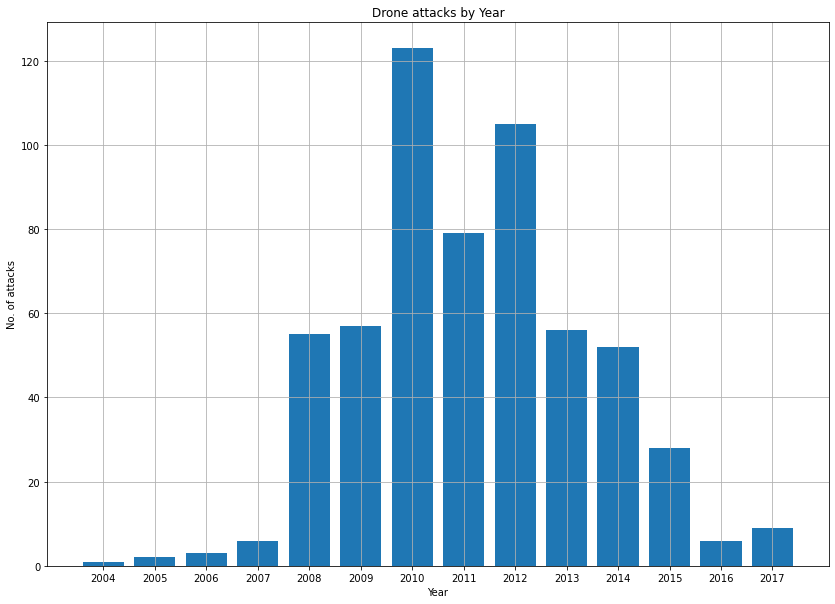

In [19]:
#Number of Drone Attacks over the Years
fig1 = plt.figure(figsize=(14, 10))
fig1 = plt.bar(list(by_year.keys()), height=by_year.values)
plt.xlabel("Year")
plt.ylabel("No. of attacks")
plt.title("Drone attacks by Year")
plt.xticks(list(by_year.keys()))
plt.grid()
plt.show()

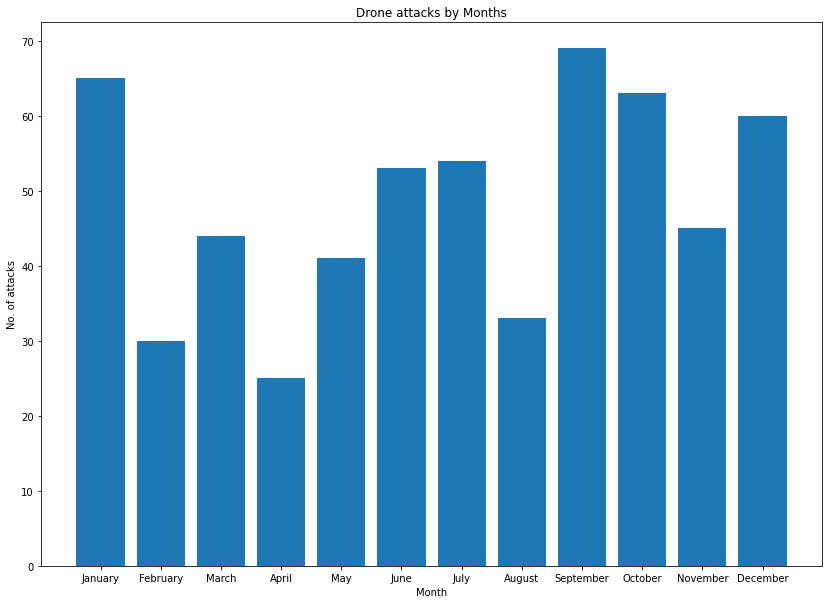

In [20]:
# Number of Drone Attacks by Month
fig3 = plt.figure(figsize=(14, 10))
fig3 = plt.bar(list(by_month.keys()), height=by_month.values)
plt.xlabel("Month")
plt.ylabel("No. of attacks")
plt.title("Drone attacks by Months")
plt.xticks(range(1,13), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
plt.show()

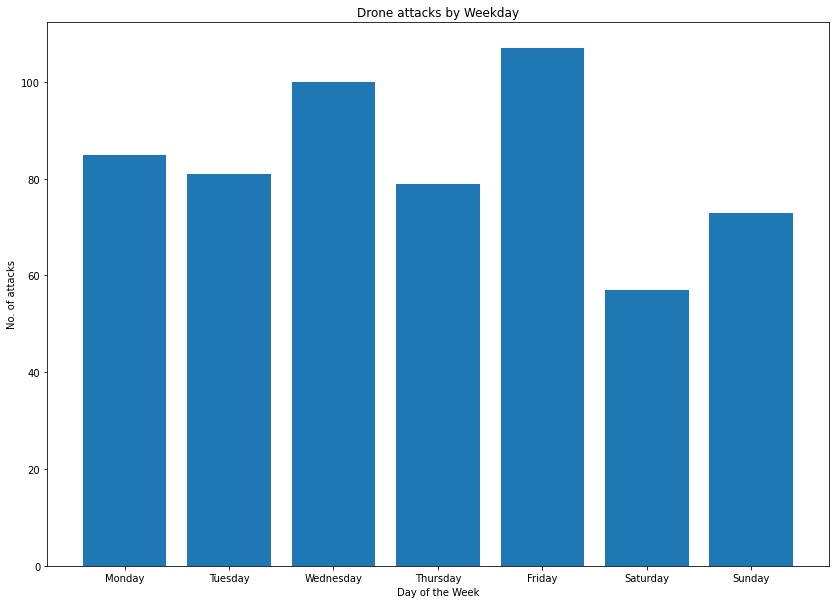

In [21]:
#Number of Drone Attacks by Day of a week
fig2 = plt.figure(figsize=(14, 10))
fig2 = plt.bar(list(by_weekday.keys()), height=by_weekday.values)
plt.xlabel("Day of the Week")
plt.ylabel("No. of attacks")
plt.title("Drone attacks by Weekday")
plt.xticks(range(0,7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

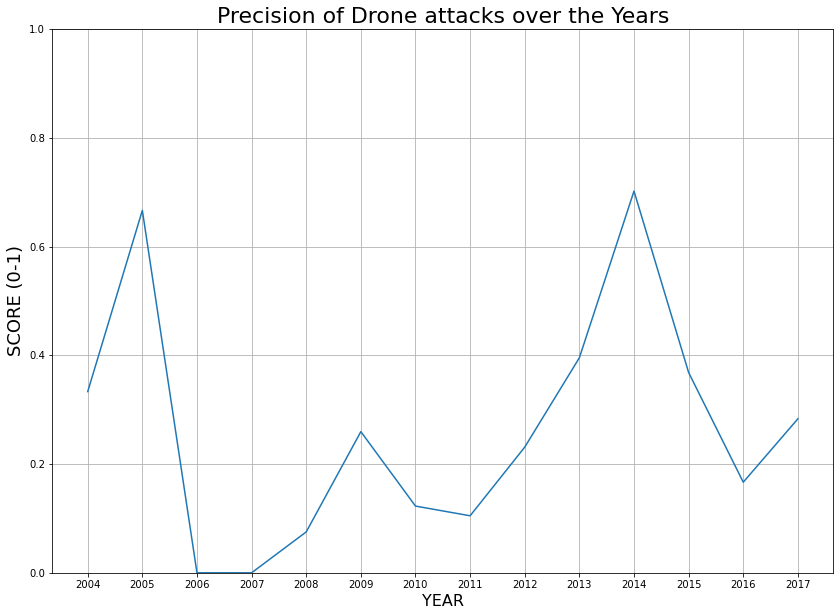

In [22]:
#Precision is being calculated by taking the number of Terrorists killed and dividing it by the total number of people killed (including 'Civilians' and 'Foreigners')
fig = plt.figure(figsize=(14, 10))
fig = plt.plot(data_byyear.Accuracy.keys(), data_byyear.Accuracy)
plt.xlabel("YEAR", fontsize=16)
plt.ylabel("SCORE (0-1)", fontsize=18)
plt.title("Precision of Drone attacks over the Years", fontsize=22)
plt.xticks(range(2004, 2018))
plt.ylim(0, 1)
plt.grid()
plt.show()

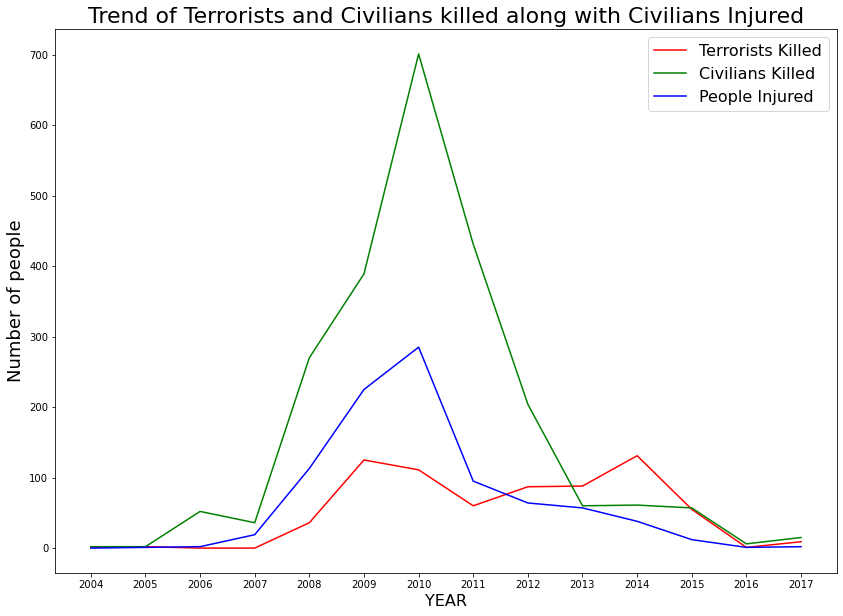

In [23]:
#Trend of Civilians and Terrorists killed along with people Injured
fig = plt.figure(figsize=(14, 10))
x = data_byyear.Accuracy.keys()

plt.plot(x, data_byyear.Terrorists, color='r', label = 'Terrorists Killed')
plt.plot(x, data_byyear.Innocents, color='g', label = 'Civilians Killed')
plt.plot(x, data_byyear.Injured, color='b', label = 'People Injured')
plt.xticks(range(2004, 2018))
plt.xlabel("YEAR", fontsize=16)
plt.ylabel("Number of people", fontsize=18)
plt.title("Trend of Terrorists and Civilians killed along with Civilians Injured", fontsize=22)
plt.legend(fontsize = 16)
plt.show()

<ipython-input-24-ad8077d7d562>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Year'][i]= data.loc[:,'DateTime'][i].year
No handles with labels found to put in legend.


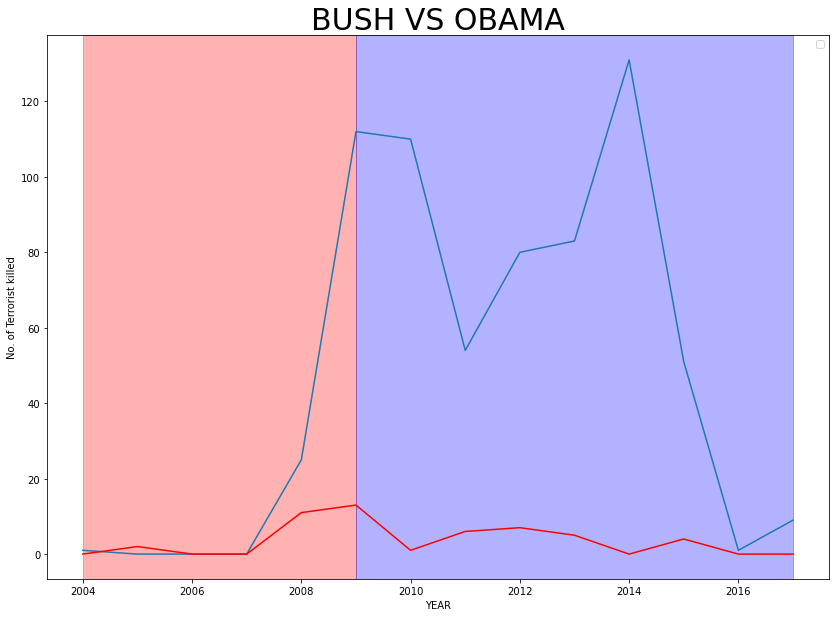

,0,Taliban,Al-Qaeda
Year,,,
2004.0,1,1,0
2005.0,2,0,2
2006.0,3,0,0
2007.0,4,0,0
2008.0,36,25,11
2009.0,50,112,13
2010.0,109,110,1
2011.0,73,54,6
2012.0,51,80,7


In [24]:
#Al-Qaeda vs Taliban and Bush vs Obama
def timeperiodyearTA(data):
    
    a1=[]
    data['Year'] = np.nan
    data['Weekday'] = np.nan
    data['Month'] = np.nan

    for i in range(0, 403):
        data.loc[:,'Year'][i]= data.loc[:,'DateTime'][i].year
    
# Grouping the new column by the Year
    by_year = data.groupby('Year').size()
    df7 = pd.DataFrame(by_year)
    timeyear = [2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0]
    df7['Taliban'] = 0
    df7['Al-Qaeda'] = 0
    for i in range(0, 403):
            for x in range(len(timeyear)):
                if (data.loc[:,'Year'][i] == timeyear[x]):

#Calculating total no Taliban personnel killed
                    df7['Taliban'][timeyear[x]] = df7['Taliban'][timeyear[x]] + data['Taliban'][i]

#Calculating total no Taliban personnel killed
                    df7['Al-Qaeda'][timeyear[x]] = df7['Al-Qaeda'][timeyear[x]] + data['Al-Qaeda'][i]
    x = df7.index.values
    y1= df7['Taliban']
    y2= df7['Al-Qaeda']

#plotting the graph for analysis of drone strike under Bush and Obama
    fig1= plt.figure(figsize=(14, 10))
    plt.plot(x,y1)
    plt.plot(x,y2,color="red")
    plt.ylabel("No. of Terrorist killed")
    plt.title("BUSH VS OBAMA", fontsize = 30)
    plt.xlabel("YEAR")
    plt.legend()
    plt.axvspan(2004, 2009, color='red', alpha=0.3)
    plt.axvspan(2009, 2017, color='blue', alpha=0.3)
    plt.show()
    return df7
timeperiodyearTA(df)